In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import datapane as dp
import altair as alt

In [24]:
def alt_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    df = pd.DataFrame(np.array([in_seq, tar_seq, predicted_seq]).transpose())
    line = alt.Chart(df).mark_line(interpolate='basis').encode(
        x='x:Q',
        y='y:Q',
        color='category:N'
    )
    

for i in range(1):
    alt_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

<bound method NDFrame.head of               0         1         2
0      0.547055       NaN       NaN
1      0.563388       NaN       NaN
2      0.567237       NaN       NaN
3      0.572820       NaN       NaN
4      0.604373       NaN       NaN
...         ...       ...       ...
25914       NaN  0.626746  0.681796
25915       NaN  0.624756  0.685534
25916       NaN  0.625980  0.674663
25917       NaN  0.625671  0.680293
25918       NaN  0.621400  0.676484

[25919 rows x 3 columns]>


In [25]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    return fig_predict  

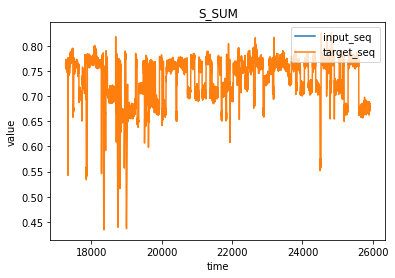

<Figure size 36000x1440 with 0 Axes>

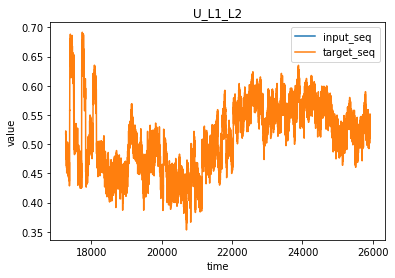

<Figure size 36000x1440 with 0 Axes>

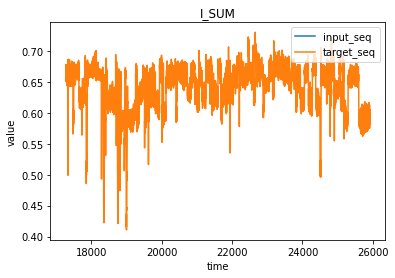

<Figure size 36000x1440 with 0 Axes>

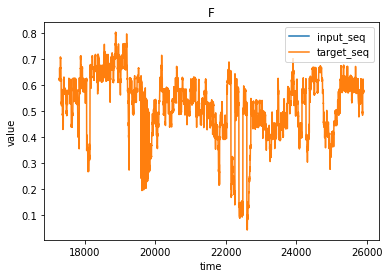

<Figure size 36000x1440 with 0 Axes>

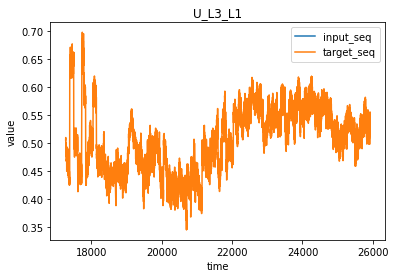

<Figure size 36000x1440 with 0 Axes>

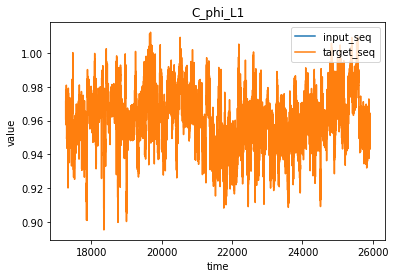

<Figure size 36000x1440 with 0 Axes>

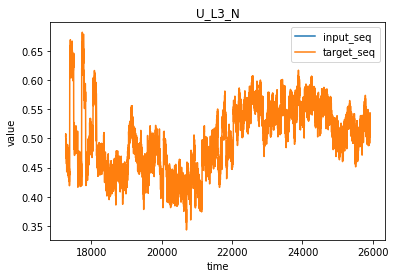

<Figure size 36000x1440 with 0 Axes>

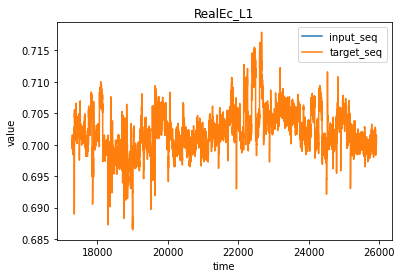

<Figure size 36000x1440 with 0 Axes>

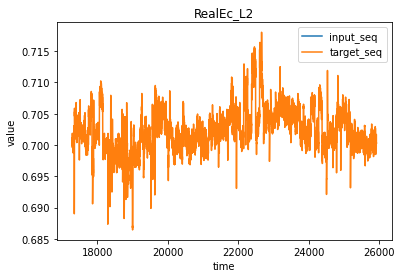

<Figure size 36000x1440 with 0 Axes>

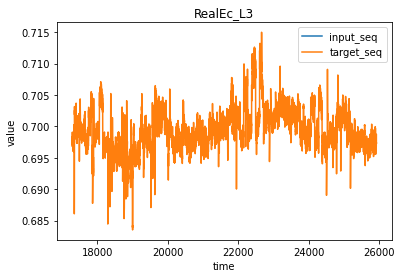

<Figure size 36000x1440 with 0 Axes>

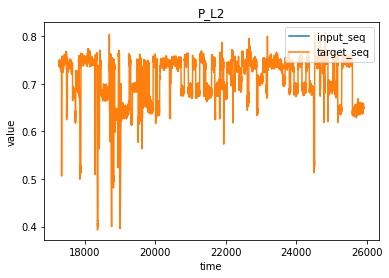

<Figure size 36000x1440 with 0 Axes>

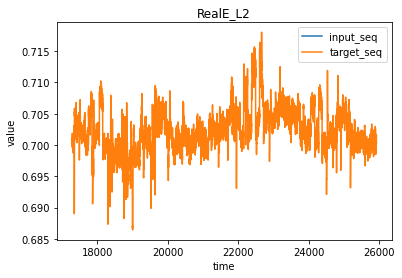

<Figure size 36000x1440 with 0 Axes>

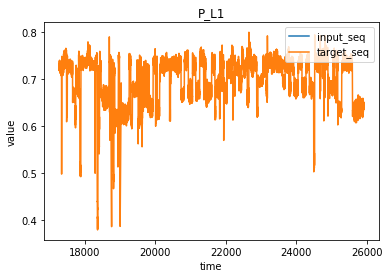

<Figure size 36000x1440 with 0 Axes>

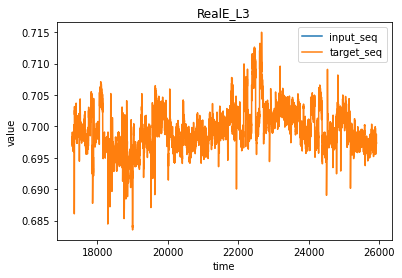

<Figure size 36000x1440 with 0 Axes>

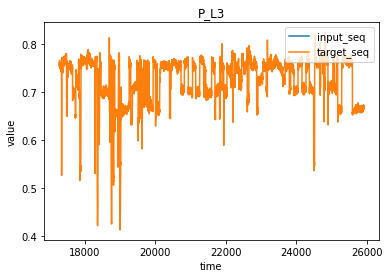

<Figure size 36000x1440 with 0 Axes>

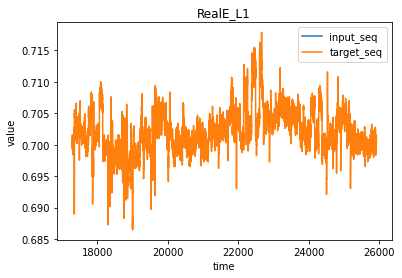

<Figure size 36000x1440 with 0 Axes>

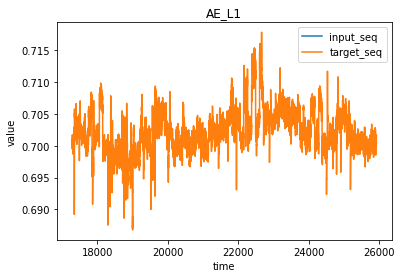

<Figure size 36000x1440 with 0 Axes>

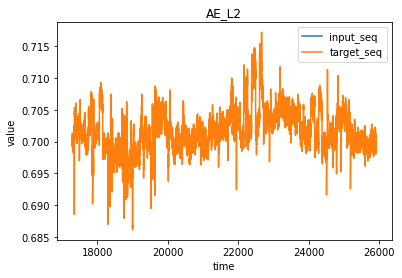

<Figure size 36000x1440 with 0 Axes>

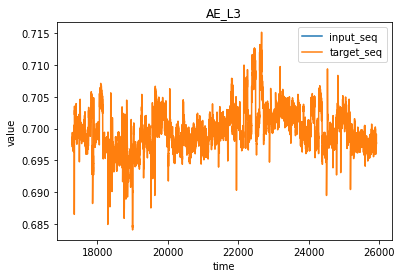

<Figure size 36000x1440 with 0 Axes>

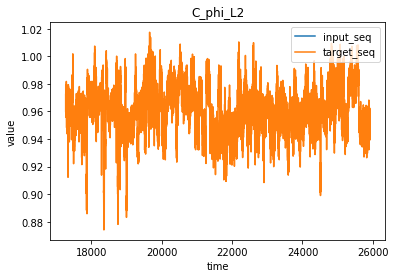

<Figure size 36000x1440 with 0 Axes>

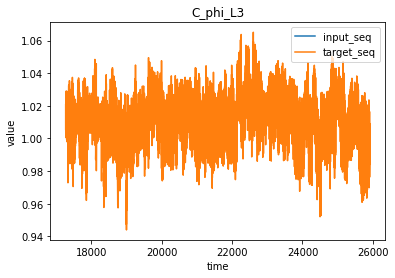

<Figure size 36000x1440 with 0 Axes>

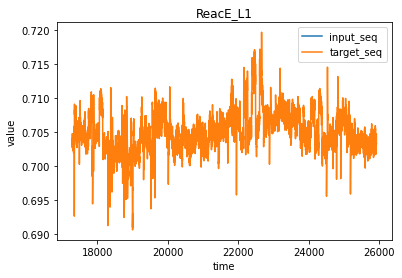

<Figure size 36000x1440 with 0 Axes>

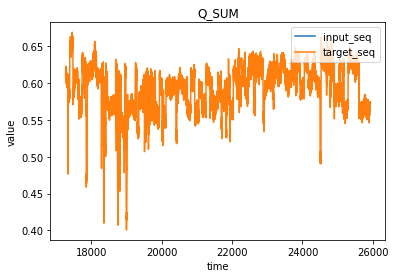

<Figure size 36000x1440 with 0 Axes>

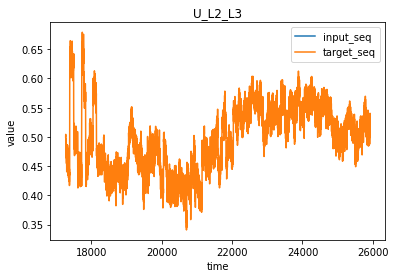

<Figure size 36000x1440 with 0 Axes>

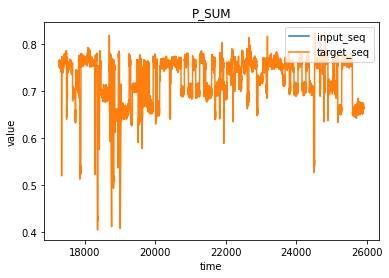

<Figure size 36000x1440 with 0 Axes>

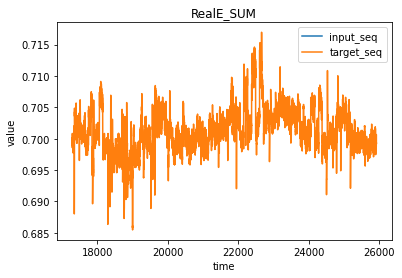

<Figure size 36000x1440 with 0 Axes>

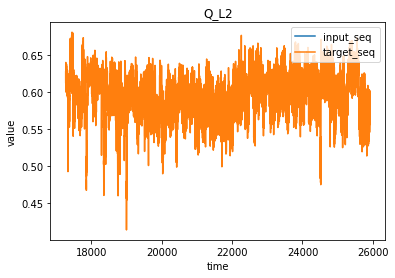

<Figure size 36000x1440 with 0 Axes>

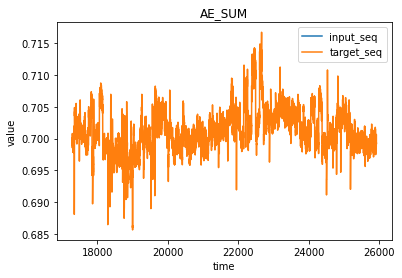

<Figure size 36000x1440 with 0 Axes>

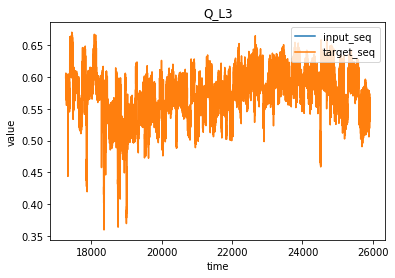

<Figure size 36000x1440 with 0 Axes>

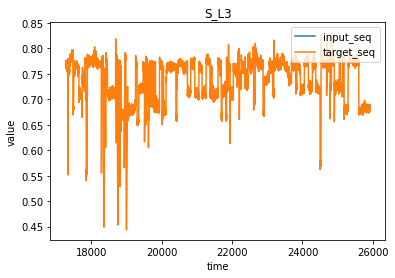

<Figure size 36000x1440 with 0 Axes>

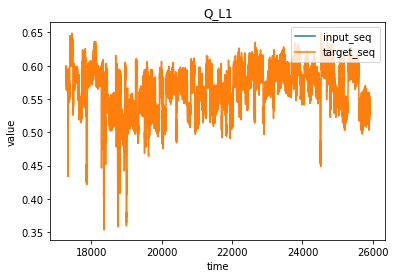

<Figure size 36000x1440 with 0 Axes>

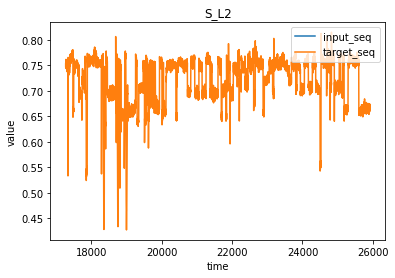

<Figure size 36000x1440 with 0 Axes>

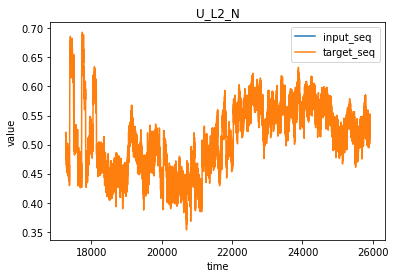

<Figure size 36000x1440 with 0 Axes>

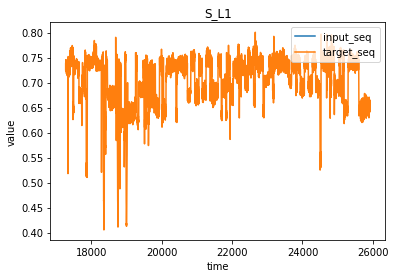

<Figure size 36000x1440 with 0 Axes>

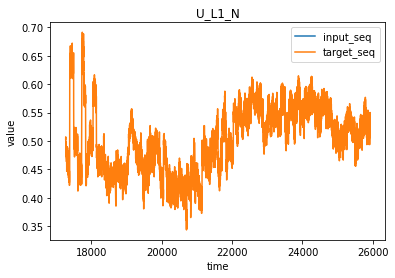

<Figure size 36000x1440 with 0 Axes>

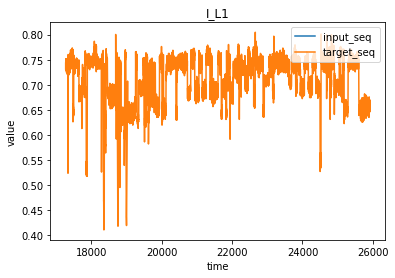

<Figure size 36000x1440 with 0 Axes>

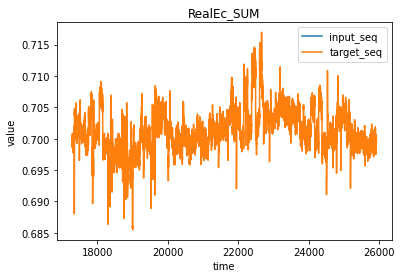

<Figure size 36000x1440 with 0 Axes>

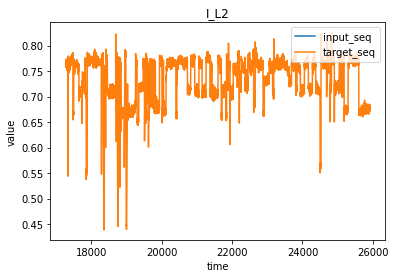

<Figure size 36000x1440 with 0 Axes>

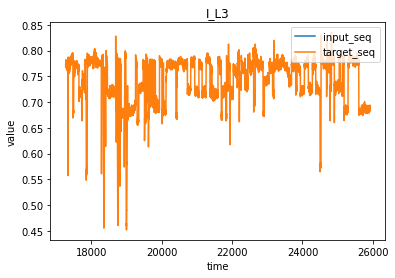

<Figure size 36000x1440 with 0 Axes>

DPError: Can't create Select with less than 2 objects
Please run with `dp.enable_logging()`, restart your Jupyter kernel/Python instance, and/or visit https://www.github.com/datapane/datapane to raise issue / discuss if error repeats

In [14]:
plot_list = []
for i in range(len(cols)):
    fig = plot_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))
    plot_list.append(dp.Plot(fig))

report = dp.Report(
    dp.Text('''## Dropdown using Datapane'''),
    dp.Select(blocks = plot_list)
)

In [5]:
hist = pd.read_csv("results/ICA_LSTM_60secs_loss.csv", index_col='Unnamed: 0')
hist.head()

,Loss,Validation Loss
0,0.000417,0.000491
1,0.000349,0.000442
2,0.000330,0.000431
3,0.000329,0.000455
4,0.000317,0.000448


<AxesSubplot:>

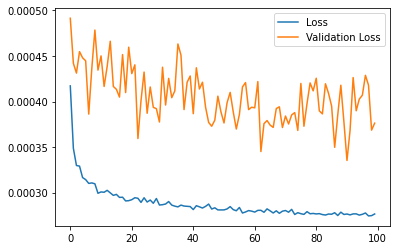

In [6]:
hist.plot()

In [7]:
pred = pd.read_csv("results/ICA_LSTM_60secs_prediction.csv", index_col='Unnamed: 0')
pred.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.764630,0.517709,0.654053,0.624285,0.506054,0.971365,0.503563,0.700162,0.700456,0.697604,...,0.767556,0.593710,0.752507,0.516474,0.737599,0.503006,0.743059,0.699411,0.764429,0.772451
1,0.756038,0.491014,0.668902,0.619303,0.490321,0.960556,0.481866,0.700099,0.700383,0.697575,...,0.762449,0.573858,0.745989,0.491820,0.724048,0.486455,0.730167,0.699355,0.759032,0.768402
2,0.767859,0.522681,0.651528,0.627585,0.510328,0.978324,0.508084,0.700457,0.700755,0.697895,...,0.770603,0.598362,0.755486,0.521282,0.741095,0.507323,0.746363,0.699706,0.767203,0.775270
3,0.767171,0.509624,0.653353,0.621872,0.494982,0.973029,0.494338,0.700708,0.701011,0.698177,...,0.769253,0.595447,0.754723,0.507896,0.741147,0.492333,0.747099,0.699968,0.767055,0.774575
4,0.759661,0.475525,0.677816,0.620054,0.479302,0.963936,0.468364,0.699698,0.699993,0.697211,...,0.767573,0.570222,0.750454,0.477181,0.725240,0.475231,0.731828,0.698971,0.764233,0.774168


In [8]:
length = pred.shape[0]

In [9]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
#Remove cols with the same value

def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_12716\468073868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(467334, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-02-22T11:17:24.127703575Z,123259.65,411.39,1.12,50.01,411.12,0.99,236.57,31345348,30444914,30360338,...,42346.98,6085.66,39469.35,238.10,41443.33,237.23,174.70,92150704,165.77,179.00
2022-02-22T11:17:25.439348217Z,122868.31,411.33,1.05,50.01,409.30,0.98,236.51,31345362,30444928,30360352,...,40454.14,7272.30,39607.47,237.89,42806.71,236.40,181.08,92150752,166.49,171.04
2022-02-22T11:17:26.705083973Z,123108.94,411.02,1.04,50.01,410.57,0.98,237.13,31345374,30444940,30360364,...,40749.97,8029.02,41030.93,237.73,41328.03,237.20,174.23,92150784,172.60,171.85
2022-02-22T11:17:28.014494747Z,123048.30,410.90,1.02,50.01,410.75,0.99,236.20,31345388,30444952,30360380,...,42542.77,5632.11,39168.28,237.67,41337.26,237.06,174.37,92150824,164.80,180.11
2022-02-22T11:17:29.306443661Z,122208.24,409.81,1.08,50.01,409.76,0.99,235.70,31345400,30444964,30360392,...,41760.77,5949.70,39547.37,237.24,40900.10,236.52,172.93,92150864,166.70,177.18


In [10]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns, index=df.index)
scaled_df.head()

,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-02-15T10:24:58.903000343Z,0.743565,0.525206,0.537234,0.681818,0.446846,0.98,0.519724,0.000000,0.000000,0.000000,...,0.707483,0.627333,0.739096,0.498763,0.747683,0.466906,0.756375,0.000000,0.752907,0.711968
2022-02-15T10:24:59.374508444Z,0.739004,0.493876,0.659574,0.681818,0.443589,0.99,0.453649,0.000003,0.000003,0.000003,...,0.737740,0.507947,0.731334,0.479960,0.712904,0.448435,0.722294,0.000003,0.746200,0.746613
2022-02-15T10:25:00.655871379Z,0.741547,0.513814,0.452128,0.681818,0.499260,0.99,0.510848,0.000006,0.000006,0.000006,...,0.725338,0.558912,0.735819,0.502721,0.727841,0.507953,0.733805,0.000006,0.749335,0.730465
2022-02-15T10:25:01.887888454Z,0.743124,0.527770,0.531915,0.681818,0.469944,0.99,0.522682,0.000009,0.000009,0.000009,...,0.739171,0.497014,0.736202,0.503711,0.718695,0.485890,0.725887,0.000009,0.749663,0.743651
2022-02-15T10:25:03.145591485Z,0.739277,0.455711,0.659574,0.681818,0.444773,0.99,0.449211,0.000012,0.000012,0.000012,...,0.744462,0.509748,0.740470,0.445819,0.698377,0.455105,0.707189,0.000012,0.757755,0.753730


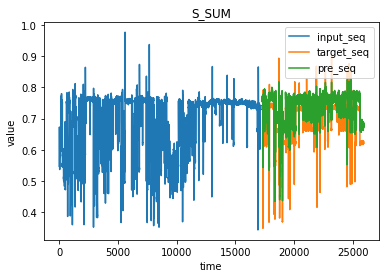

<Figure size 36000x1440 with 0 Axes>

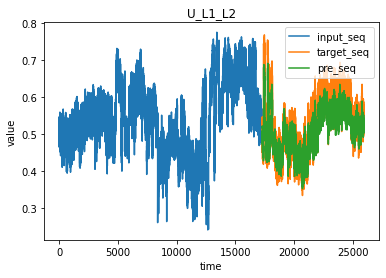

<Figure size 36000x1440 with 0 Axes>

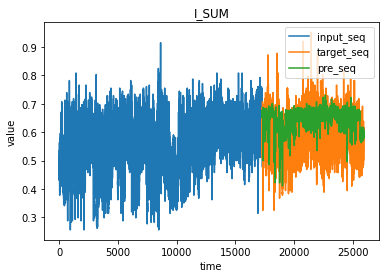

<Figure size 36000x1440 with 0 Axes>

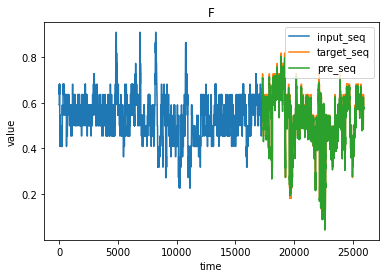

<Figure size 36000x1440 with 0 Axes>

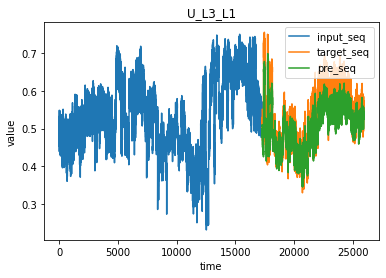

<Figure size 36000x1440 with 0 Axes>

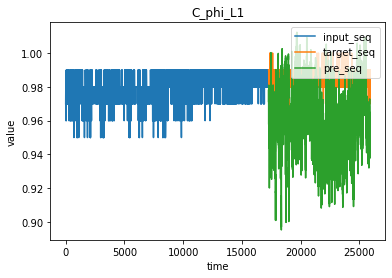

<Figure size 36000x1440 with 0 Axes>

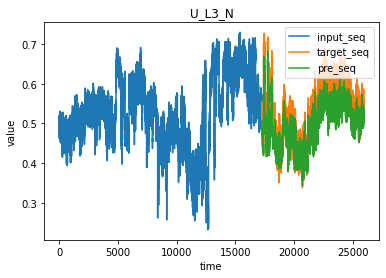

<Figure size 36000x1440 with 0 Axes>

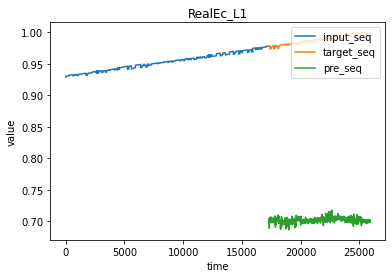

<Figure size 36000x1440 with 0 Axes>

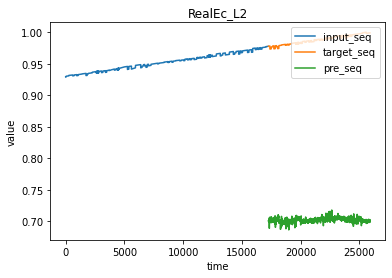

<Figure size 36000x1440 with 0 Axes>

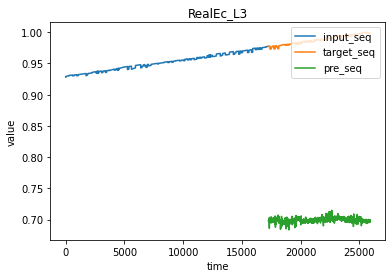

<Figure size 36000x1440 with 0 Axes>

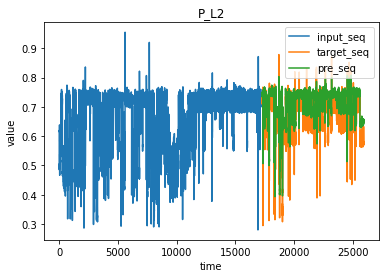

<Figure size 36000x1440 with 0 Axes>

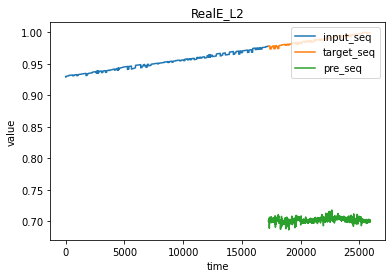

<Figure size 36000x1440 with 0 Axes>

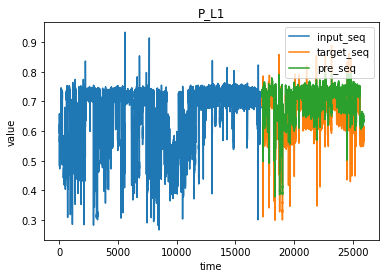

<Figure size 36000x1440 with 0 Axes>

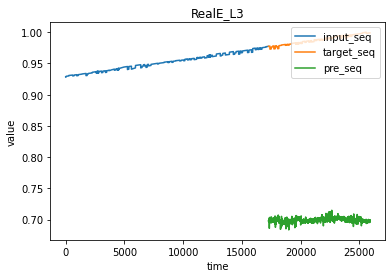

<Figure size 36000x1440 with 0 Axes>

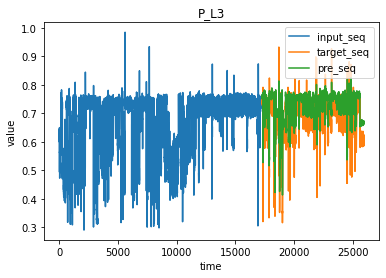

<Figure size 36000x1440 with 0 Axes>

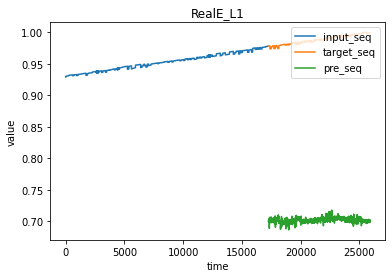

<Figure size 36000x1440 with 0 Axes>

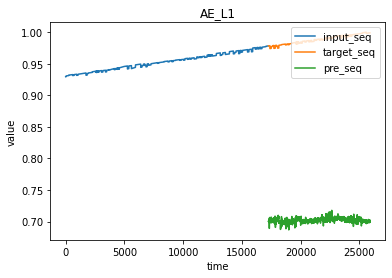

<Figure size 36000x1440 with 0 Axes>

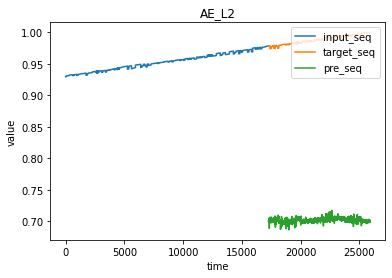

<Figure size 36000x1440 with 0 Axes>

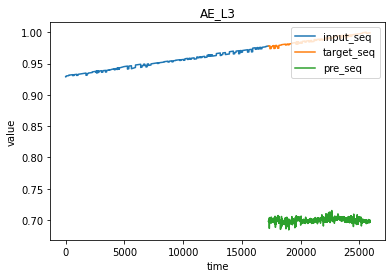

<Figure size 36000x1440 with 0 Axes>

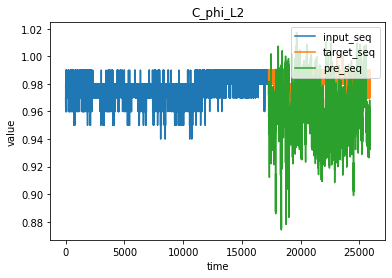

<Figure size 36000x1440 with 0 Axes>

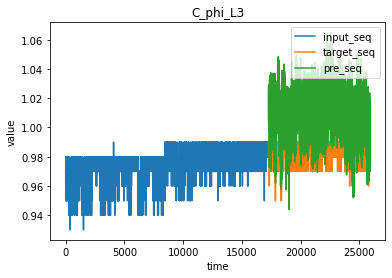

<Figure size 36000x1440 with 0 Axes>

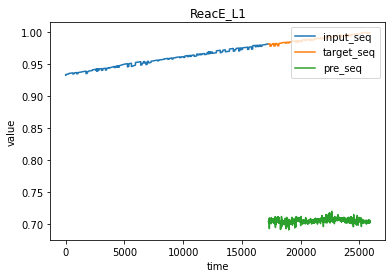

<Figure size 36000x1440 with 0 Axes>

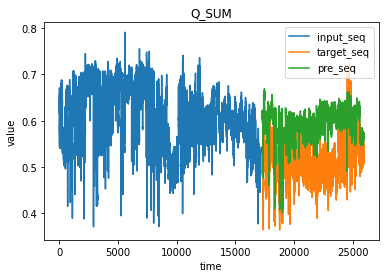

<Figure size 36000x1440 with 0 Axes>

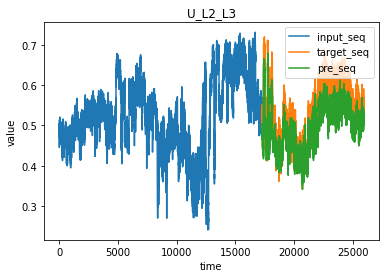

<Figure size 36000x1440 with 0 Axes>

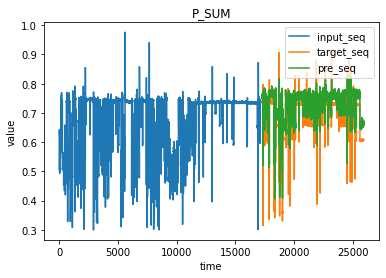

<Figure size 36000x1440 with 0 Axes>

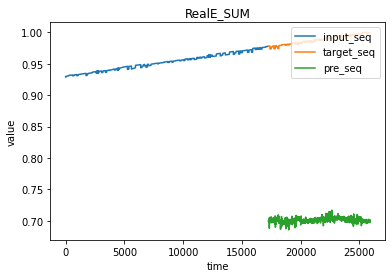

<Figure size 36000x1440 with 0 Axes>

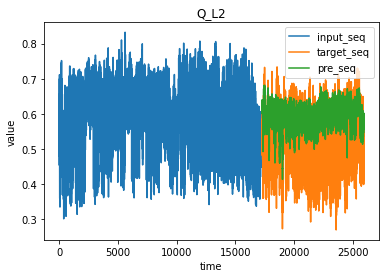

<Figure size 36000x1440 with 0 Axes>

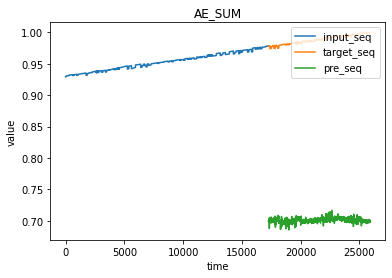

<Figure size 36000x1440 with 0 Axes>

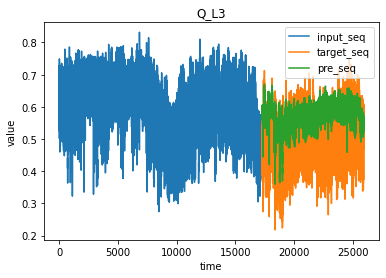

<Figure size 36000x1440 with 0 Axes>

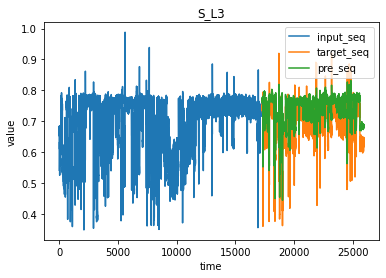

<Figure size 36000x1440 with 0 Axes>

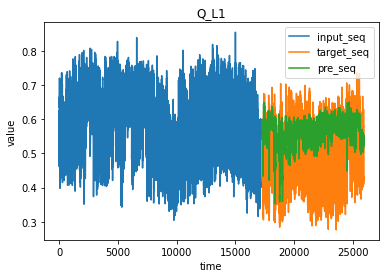

<Figure size 36000x1440 with 0 Axes>

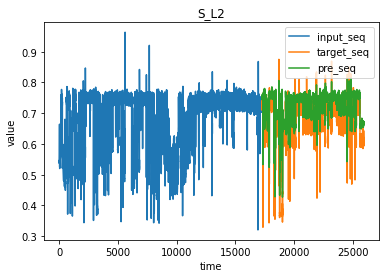

<Figure size 36000x1440 with 0 Axes>

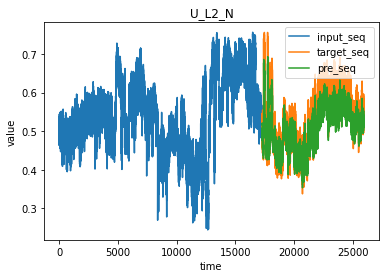

<Figure size 36000x1440 with 0 Axes>

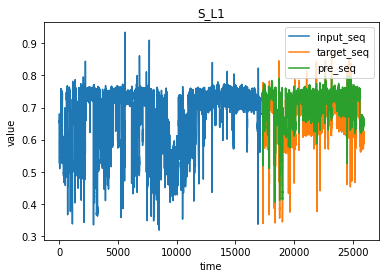

<Figure size 36000x1440 with 0 Axes>

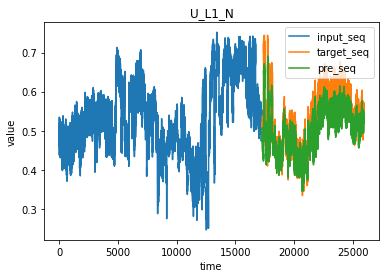

<Figure size 36000x1440 with 0 Axes>

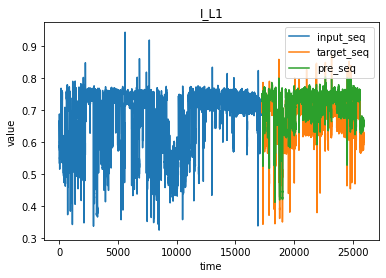

<Figure size 36000x1440 with 0 Axes>

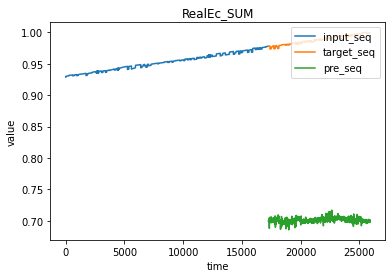

<Figure size 36000x1440 with 0 Axes>

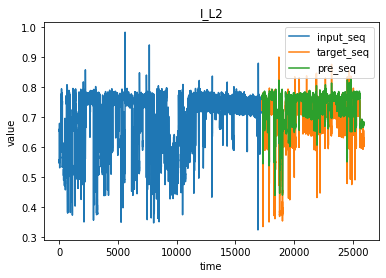

<Figure size 36000x1440 with 0 Axes>

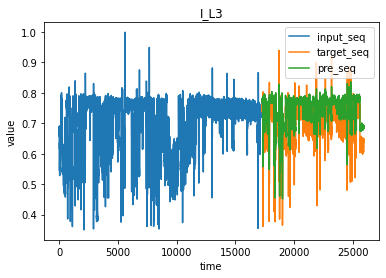

<Figure size 36000x1440 with 0 Axes>

In [11]:
values = scaled_df.values
history_window = int(0.3*24*60*60)
prediction_window = int(0.1*24*60*60)
hist = values[-history_window:-prediction_window,:]
test = values[-prediction_window:,]
fc = pred.values
cols = scaled_df.columns

for i in range(len(cols)):
    plot_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

In [12]:
from sklearn.metrics import mean_squared_error

for i in range(len(cols)):
    rmse = np.sqrt(mean_squared_error(test[:,i], fc[:,i]))
    print('Test %s RMSE: %.3f' % (cols[i], rmse))


Test S_SUM RMSE: 0.046
Test U_L1_L2 RMSE: 0.038
Test I_SUM RMSE: 0.080
Test F RMSE: 0.046
Test U_L3_L1 RMSE: 0.039
Test C_phi_L1 RMSE: 0.032
Test U_L3_N RMSE: 0.037
Test RealEc_L1 RMSE: 0.286
Test RealEc_L2 RMSE: 0.286
Test RealEc_L3 RMSE: 0.288
Test P_L2 RMSE: 0.050
Test RealE_L2 RMSE: 0.286
Test P_L1 RMSE: 0.043
Test RealE_L3 RMSE: 0.288
Test P_L3 RMSE: 0.047
Test RealE_L1 RMSE: 0.286
Test AE_L1 RMSE: 0.286
Test AE_L2 RMSE: 0.287
Test AE_L3 RMSE: 0.288
Test C_phi_L2 RMSE: 0.029
Test C_phi_L3 RMSE: 0.032
Test ReacE_L1 RMSE: 0.285
Test Q_SUM RMSE: 0.080
Test U_L2_L3 RMSE: 0.039
Test P_SUM RMSE: 0.045
Test RealE_SUM RMSE: 0.287
Test Q_L2 RMSE: 0.097
Test AE_SUM RMSE: 0.287
Test Q_L3 RMSE: 0.086
Test S_L3 RMSE: 0.047
Test Q_L1 RMSE: 0.104
Test S_L2 RMSE: 0.050
Test U_L2_N RMSE: 0.039
Test S_L1 RMSE: 0.044
Test U_L1_N RMSE: 0.036
Test I_L1 RMSE: 0.045
Test RealEc_SUM RMSE: 0.287
Test I_L2 RMSE: 0.052
Test I_L3 RMSE: 0.048
